<a href="https://colab.research.google.com/github/IsabelGayayan/Data-Mining/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#import data and libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline 
import seaborn as sns 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')

In [3]:
#descriptive stats
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


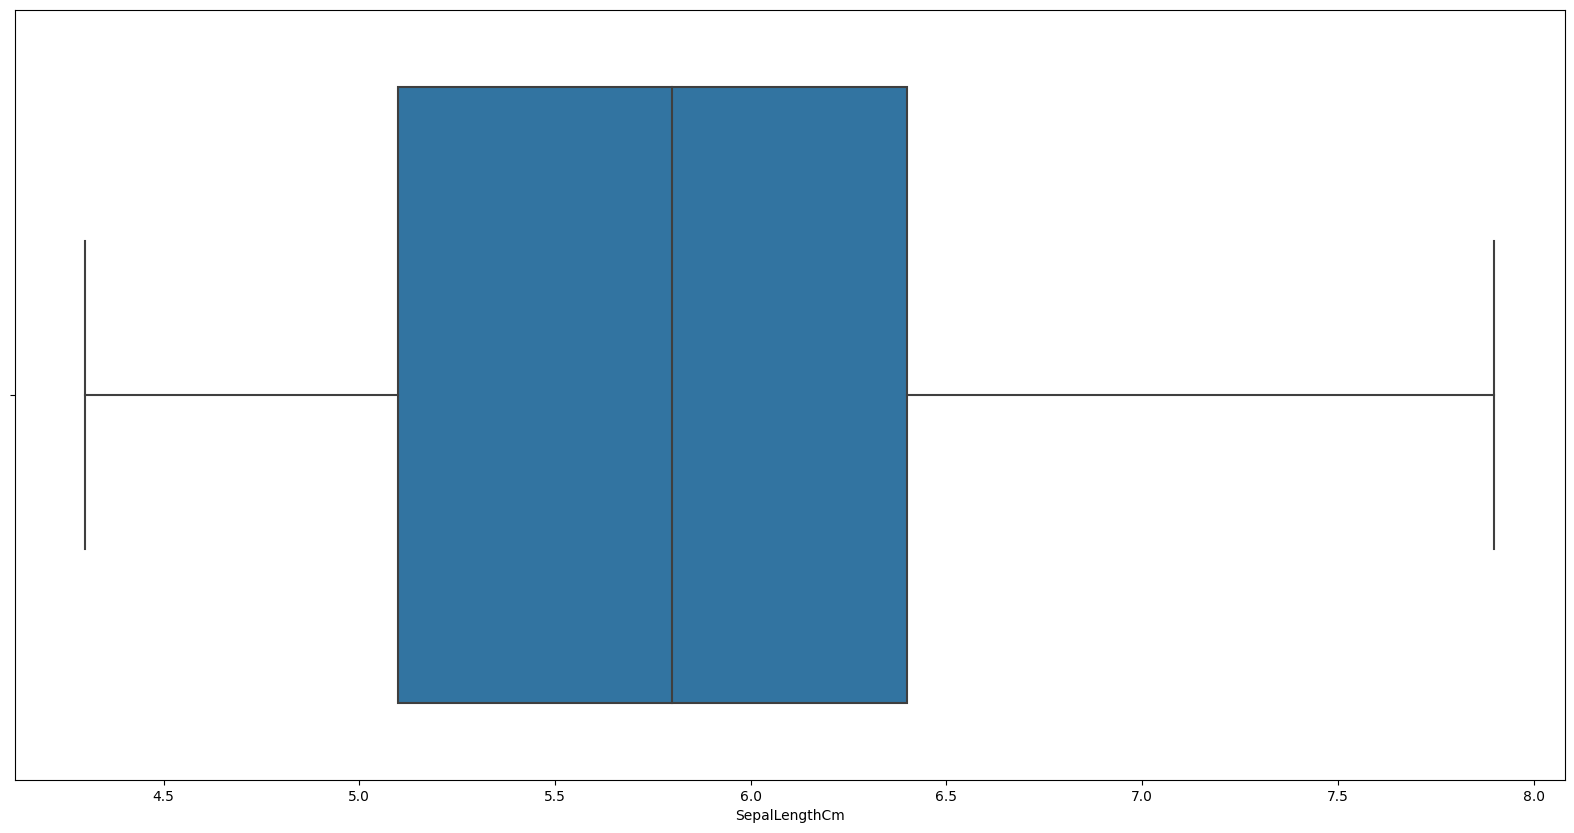

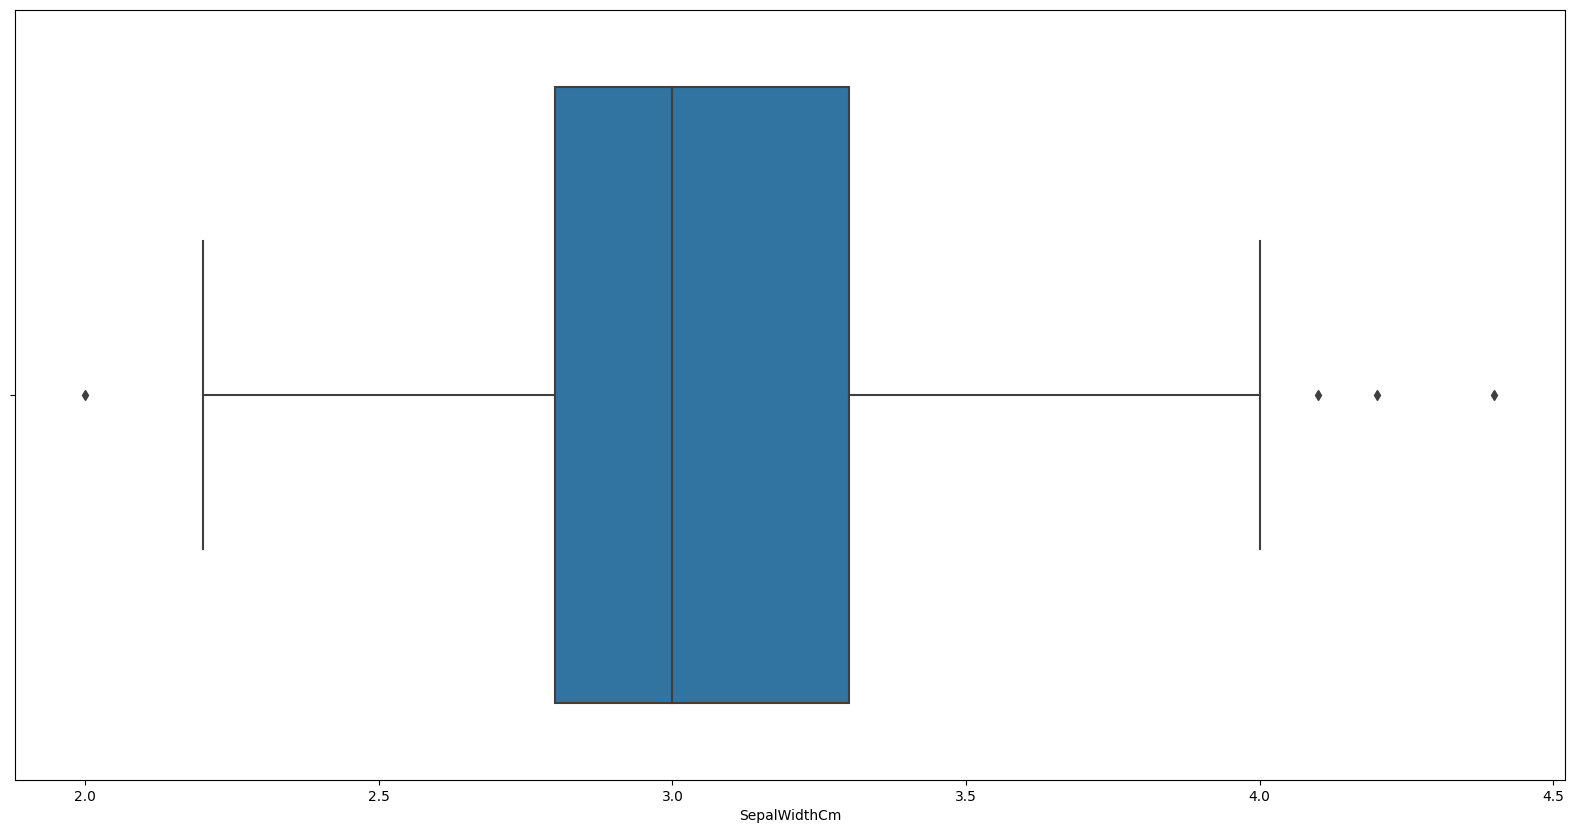

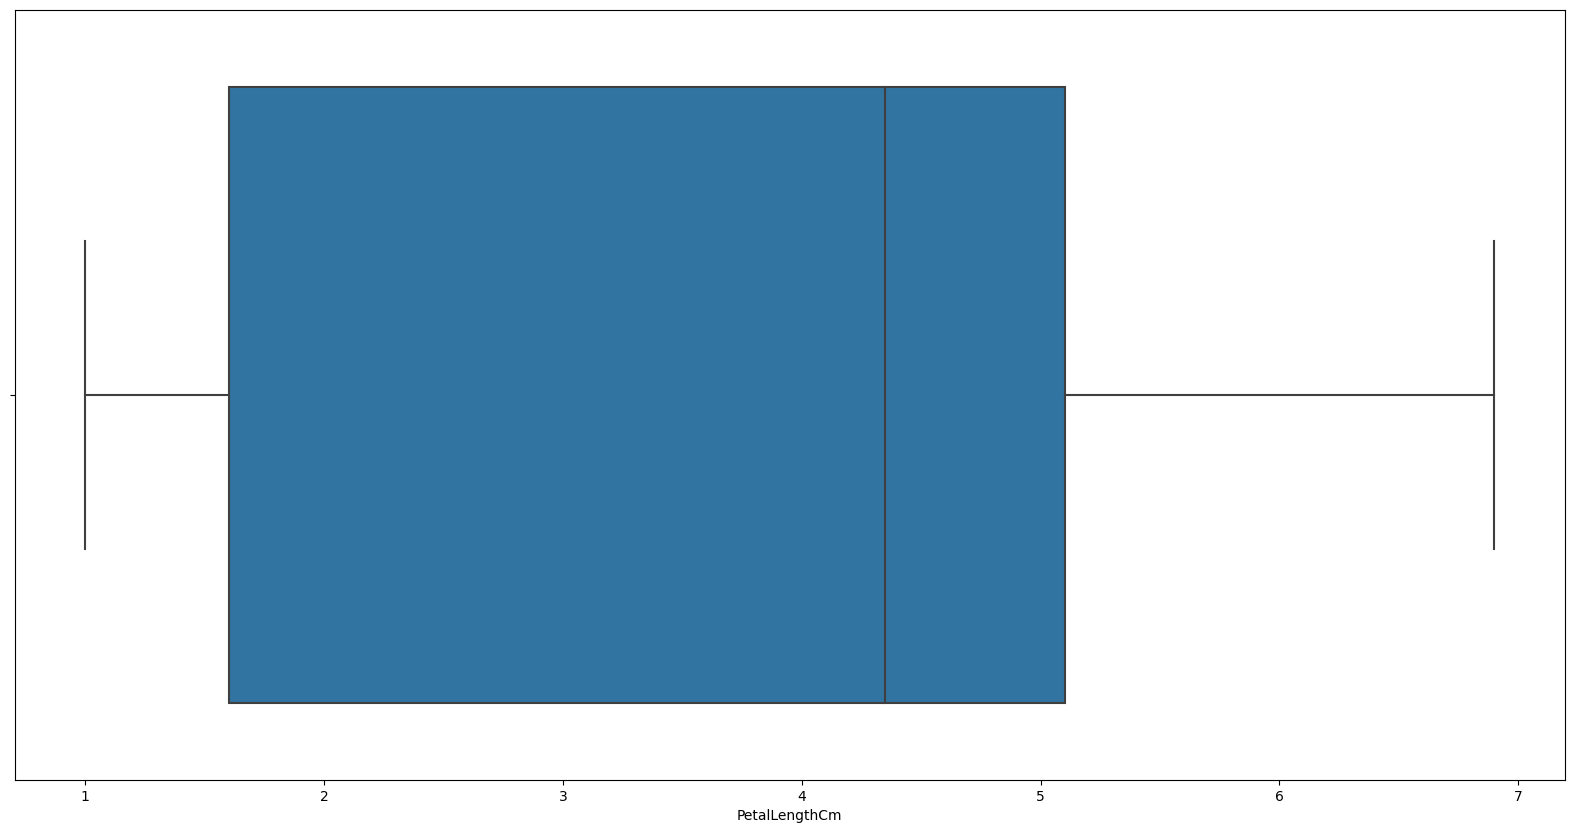

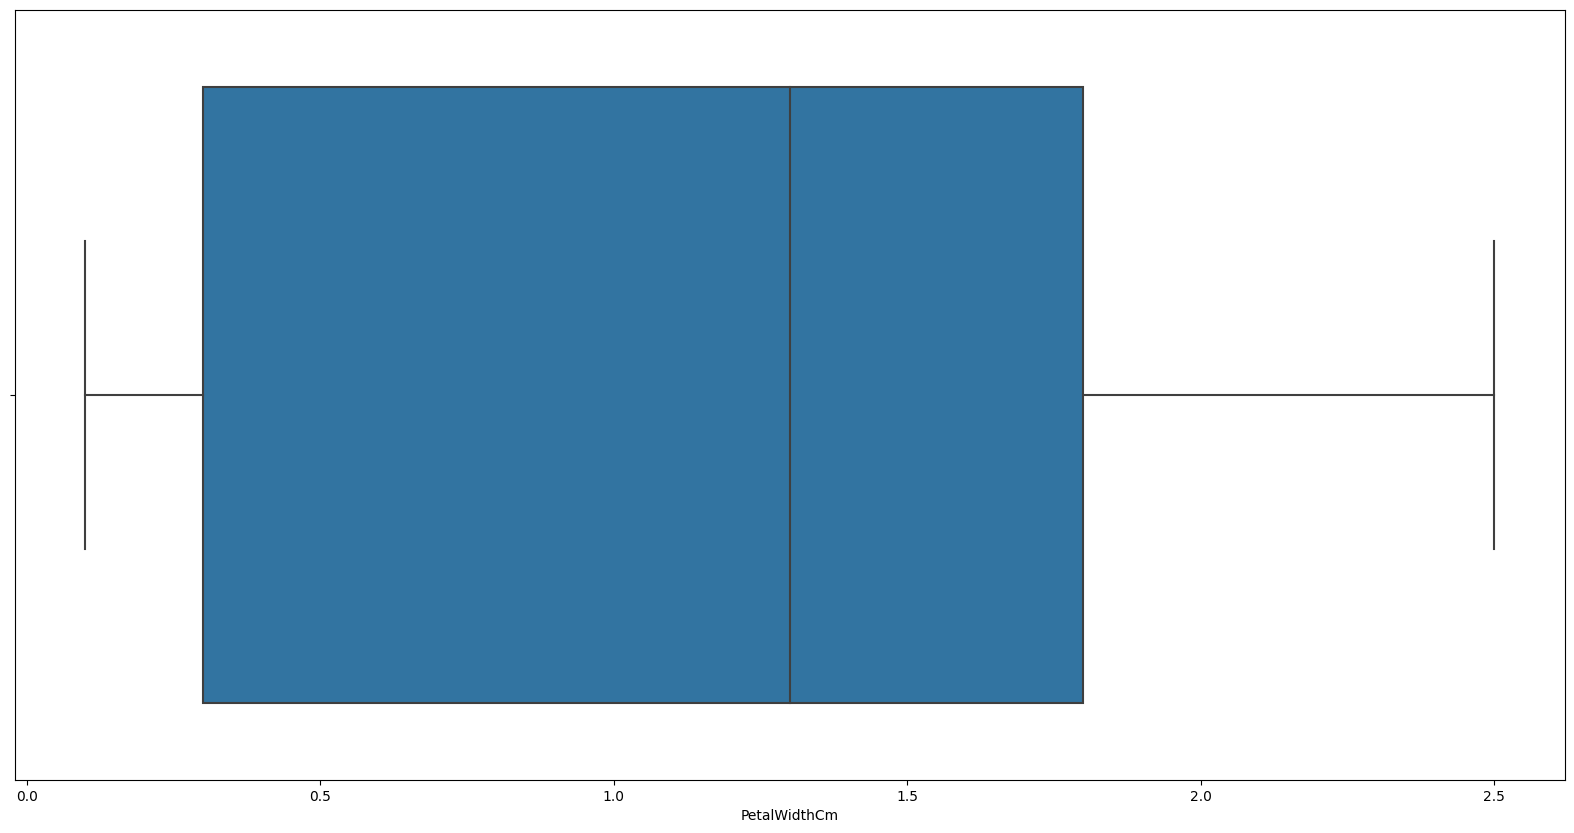

In [4]:
#check for outliers
plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = df["SepalLengthCm"]);

plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = df["SepalWidthCm"]);

plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = df["PetalLengthCm"]);

plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = df["PetalWidthCm"]);

In [5]:
#remove outliers from ph and calc
sepal_width_outliers = df.loc[df["SepalWidthCm"] > 7.9]

filter = (df['SepalWidthCm'] > 7.9)

In [6]:
#check data types if theyre all in the same format
from sklearn.preprocessing import LabelEncoder

label_encod = LabelEncoder()
for column in df.select_dtypes(include=['object']):
  df[column]=label_encod.fit_transform(df[column])

df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [7]:
#standardize your data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(df)
print(scaled_data)

[[-1.72054204e+00 -9.00681170e-01  1.03205722e+00 -1.34127240e+00
  -1.31297673e+00 -1.22474487e+00]
 [-1.69744751e+00 -1.14301691e+00 -1.24957601e-01 -1.34127240e+00
  -1.31297673e+00 -1.22474487e+00]
 [-1.67435299e+00 -1.38535265e+00  3.37848329e-01 -1.39813811e+00
  -1.31297673e+00 -1.22474487e+00]
 [-1.65125846e+00 -1.50652052e+00  1.06445364e-01 -1.28440670e+00
  -1.31297673e+00 -1.22474487e+00]
 [-1.62816394e+00 -1.02184904e+00  1.26346019e+00 -1.34127240e+00
  -1.31297673e+00 -1.22474487e+00]
 [-1.60506942e+00 -5.37177559e-01  1.95766909e+00 -1.17067529e+00
  -1.05003079e+00 -1.22474487e+00]
 [-1.58197489e+00 -1.50652052e+00  8.00654259e-01 -1.34127240e+00
  -1.18150376e+00 -1.22474487e+00]
 [-1.55888037e+00 -1.02184904e+00  8.00654259e-01 -1.28440670e+00
  -1.31297673e+00 -1.22474487e+00]
 [-1.53578584e+00 -1.74885626e+00 -3.56360566e-01 -1.34127240e+00
  -1.31297673e+00 -1.22474487e+00]
 [-1.51269132e+00 -1.14301691e+00  1.06445364e-01 -1.28440670e+00
  -1.44444970e+00 -1.2247

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
# Split dataset
from sklearn.model_selection import train_test_split
#test_size = 0.5 which will split data into: 50% testing and 50% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
X_train.shape

(75, 5)

In [24]:
from pandas.core.common import random_state
from sklearn.linear_model import Perceptron
#iterations
max_iter = 40
#learning rate
eta0 = 0.1
#random state
random_state = np.random.RandomState(seed=42)

#build model
perceptron_model = Perceptron(max_iter = max_iter,eta0 = eta0,random_state = random_state)
perceptron_model.fit(X_train,y_train)

Perceptron(eta0=0.1, max_iter=40,
           random_state=RandomState(MT19937) at 0x7F9A80A3D640)

In [26]:
#make predictions
y_pred = perceptron_model.predict(X_test)

from sklearn.metrics import accuracy_score
#check accuracy score
print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy Score: 68.00%
